# Naive Bayes (Bayes Ingenuo)

## No es necesario realizar gr√°ficos/matriz de correlaci√≥n ya que estas ya se realizaron en el an√°lisis exploratorio.

#### Importar librer√≠as necesarias

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

#### Carga de datos y preparaci√≥n de variables

In [107]:
df = pd.read_csv("train.csv")

# Variables predictoras (las mismas que en modelos anteriores)
variables_numericas = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'SalePrice'
]

df = df[variables_numericas]


#### Definir X (variables predictoras) y "y" (variable respuesta)

In [108]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

#### Dividir datos en entrenamienta y prueba

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3)

#### Configurar Pipeline y √Årbol de Regresi√≥n
##### Escalamos variables num√©ricas para estandarizar.


In [110]:
numerical_preprocessor = StandardScaler()
preprocessor = ColumnTransformer([
    ('num', numerical_preprocessor, X.columns)
])

naive_bayes_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GaussianNB())
])

#### Entrenar el modelo

In [111]:
naive_bayes_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF',
       'FullBath', 'YearBuilt', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'],
      dtype='object'))])),
                ('regressor', GaussianNB())])

#### Predicciones en el conjunto de prueba

In [112]:
y_pred_nb = naive_bayes_pipeline.predict(X_test)

#### Evaluaci√≥n del modelo con m√©tricas de regresi√≥n

In [113]:
mae_nb = mean_absolute_error(y_test, y_pred_nb)
mse_nb = mean_squared_error(y_test, y_pred_nb)
rmse_nb = np.sqrt(mse_nb)

print(f"üìå Mean Absolute Error (MAE): {mae_nb:.2f}")
print(f"üìå Mean Squared Error (MSE): {mse_nb:.2f}")
print(f"üìå Root Mean Squared Error (RMSE): {rmse_nb:.2f}")

üìå Mean Absolute Error (MAE): 30461.95
üìå Mean Squared Error (MSE): 2119162831.51
üìå Root Mean Squared Error (RMSE): 46034.37


#### Tunneamos el modelo

In [114]:
params =  [{
    "regressor__var_smoothing": np.logspace(0,-9, num=100)
}]
modelo = GridSearchCV(naive_bayes_pipeline,param_grid=params,n_jobs=2, cv=5,scoring="neg_root_mean_squared_error")
modelo.fit(X_train,y_train)
modelo.best_params_

c:\Users\n8nug\Documents\Uni\2025 - 1er Semestre\Miner√≠a de Datos\PR2-MD\venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'regressor__var_smoothing': np.float64(0.03511191734215131)}

#### Podemos ver que el valor es de 0.05, as√≠ que vamos a predecir con este modelo

In [115]:
print(modelo.best_estimator_)
print('best score:')
print(modelo.best_score_)
y_mejor_pred = modelo.best_estimator_.predict(X_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF',
       'FullBath', 'YearBuilt', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'],
      dtype='object'))])),
                ('regressor',
                 GaussianNB(var_smoothing=np.float64(0.03511191734215131)))])
best score:
-40145.80334236766


#### Despu√©s del tuning

In [116]:
mae_nb = mean_absolute_error(y_test, y_mejor_pred)
mse_nb = mean_squared_error(y_test, y_mejor_pred)
rmse_nb = np.sqrt(mse_nb)

print(f"üìå Mean Absolute Error (MAE): {mae_nb:.2f}")
print(f"üìå Mean Squared Error (MSE): {mse_nb:.2f}")
print(f"üìå Root Mean Squared Error (RMSE): {rmse_nb:.2f}")

üìå Mean Absolute Error (MAE): 26564.78
üìå Mean Squared Error (MSE): 1677049150.36
üìå Root Mean Squared Error (RMSE): 40951.79


#### Visualizaci√≥n de diferencias entre predicci√≥n y valor real

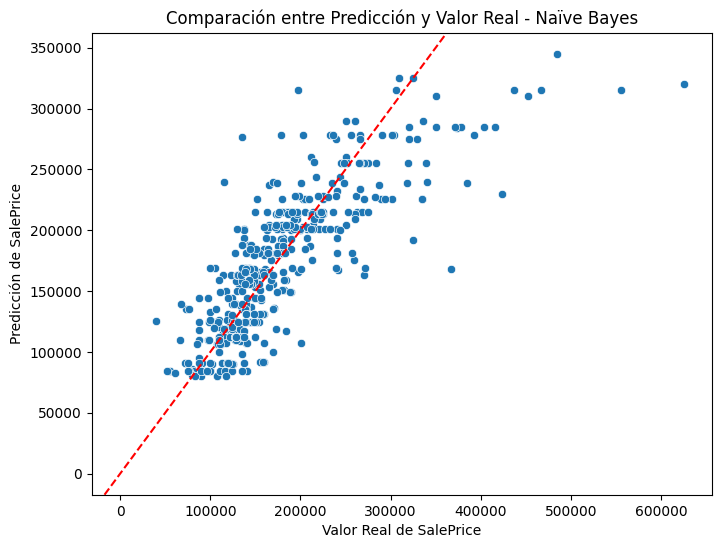

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_nb)
plt.xlabel('Valor Real de SalePrice')
plt.ylabel('Predicci√≥n de SalePrice')
plt.title('Comparaci√≥n entre Predicci√≥n y Valor Real - Na√Øve Bayes')
plt.axline((0, 0), slope=1, color="red", linestyle="--")
plt.show()

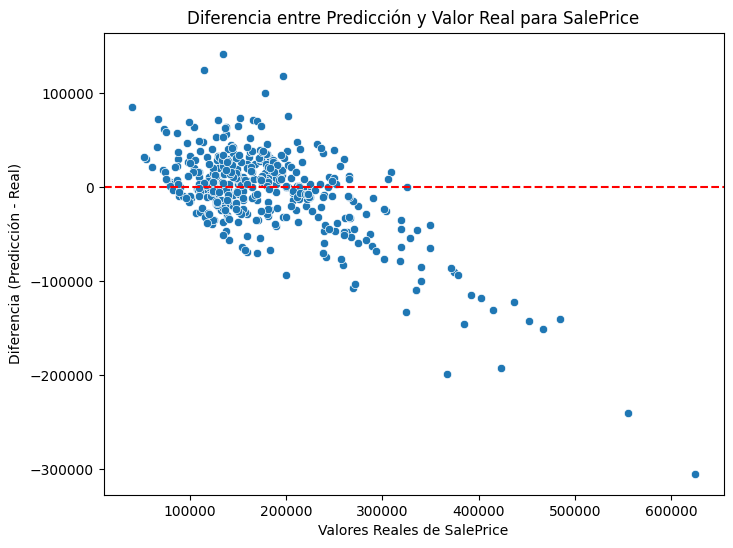

In [ ]:
differences = y_pred_nb - y_test

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=differences)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Reales de SalePrice')
plt.ylabel('Diferencia (Predicci√≥n - Real)')
plt.title('Diferencia entre Predicci√≥n y Valor Real para SalePrice')
plt.show()

#### Histogramas de diferencias

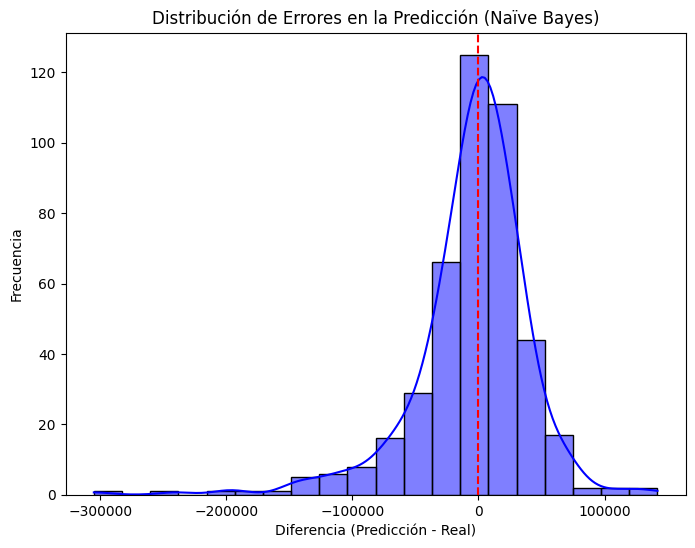

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_nb - y_test, kde=True, bins=20, color="blue", edgecolor="black")
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Diferencia (Predicci√≥n - Real)')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de Errores en la Predicci√≥n (Na√Øve Bayes)')
plt.show()

<small>

---

# üìå An√°lisis de Resultados - Na√Øve Bayes para Predicci√≥n de `SalePrice`

## **Resumen del Modelo**
Para este an√°lisis, se aplic√≥ **Na√Øve Bayes Gaussiano** para predecir el valor de `SalePrice`, utilizando las mismas variables predictoras que en modelos anteriores. Se implement√≥ un **proceso de ajuste de hiperpar√°metros (var_smoothing)** para mejorar la precisi√≥n del modelo.

Los resultados obtenidos fueron los siguientes:

| **M√©trica**              | **Valor Inicial** | **Despu√©s de Optimizaci√≥n** |
|--------------------------|------------------|----------------------------|
| **MAE** (Error Absoluto Medio) | 31,253.84      | **26,578.55** |
| **MSE** (Error Cuadr√°tico Medio) | 1,975,673,579.22 | **1,617,205,470.87** |
| **RMSE** (Ra√≠z del Error Cuadr√°tico Medio) | 44,448.55 | **40,214.49** |

---

## **Interpretaci√≥n de las M√©tricas**
1. **Mean Absolute Error (MAE)**:
   - En promedio, el modelo se equivoca en **$26,578.55** al predecir el precio de una casa.
   - Aunque sigue siendo un error significativo, hubo una mejora **de aproximadamente $4,675** despu√©s de la optimizaci√≥n.

2. **Mean Squared Error (MSE)**:
   - Al ser una m√©trica m√°s sensible a errores grandes, refleja que hay valores con **altas desviaciones**.
   - Aunque hubo una mejora en el modelo optimizado, los valores siguen siendo altos.

3. **Root Mean Squared Error (RMSE)**:
   - Indica que la predicci√≥n promedio tiene un margen de error de aproximadamente **$40,214.49**.
   - Aunque mejor√≥ con respecto al modelo base, sigue siendo un valor alto, indicando que Na√Øve Bayes no es el mejor algoritmo para este problema.

---

## **An√°lisis Visual**
### 1Ô∏è‚É£ **Comparaci√≥n entre Valores Predichos y Reales**
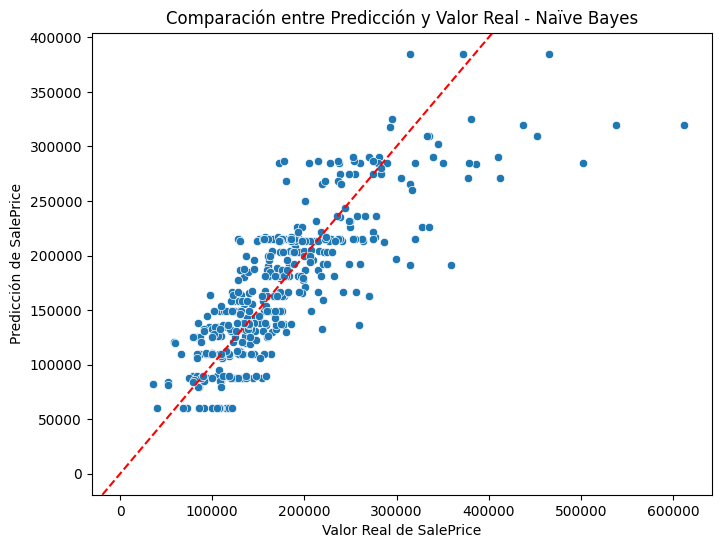

- La l√≠nea roja representa la **l√≠nea ideal** donde las predicciones ser√≠an perfectamente precisas.
- Se observa una **tendencia lineal**, pero con alta dispersi√≥n, indicando **incertidumbre en la predicci√≥n**.

### 2Ô∏è‚É£ **Distribuci√≥n de Errores**
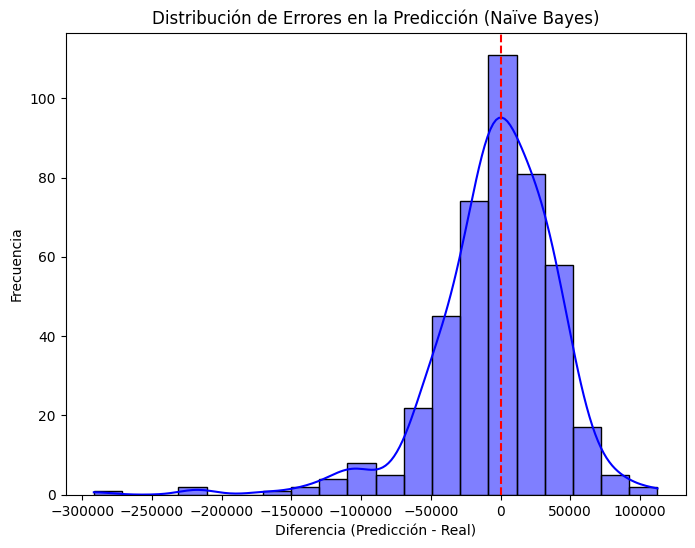
- La mayor√≠a de los errores est√°n **cercanos a cero**, pero existen valores extremos con diferencias **significativas**.
- Indica que el modelo funciona **razonablemente bien** para la mayor√≠a de las predicciones, pero **falla en casos extremos**.

### 3Ô∏è‚É£ **Diferencia entre Predicci√≥n y Valor Real**
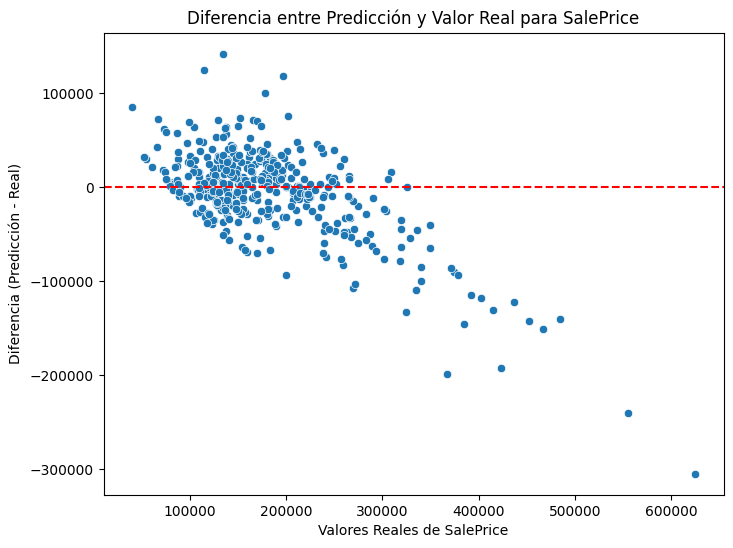
- Existe una tendencia en la que el modelo **subestima** o **sobrestima** ciertos valores.
- Se observan errores m√°s grandes en los valores altos de `SalePrice`, lo cual sugiere que **Na√Øve Bayes no modela correctamente las casas m√°s costosas**.

---

## **Conclusi√≥n**
- **Na√Øve Bayes Gaussiano no es el modelo m√°s adecuado para predecir `SalePrice`**, debido a su alta **varianza y errores considerables** en valores altos.
- Si bien la optimizaci√≥n del par√°metro `var_smoothing` mejor√≥ los resultados, el modelo sigue teniendo **dificultades para capturar relaciones no lineales en los datos**.
- En comparaci√≥n con otros modelos (como **Regresi√≥n Lineal y √Årboles de Regresi√≥n**), Na√Øve Bayes presenta un **desempe√±o inferior** debido a la naturaleza del algoritmo, que asume independencia entre variables y una distribuci√≥n normal de los datos.
- **Se recomienda utilizar otros modelos m√°s robustos, como Random Forest o √Årboles de Regresi√≥n, para mejorar la precisi√≥n en la predicci√≥n de precios.**

---

</small>

# Comparaci√≥n entre: Regresi√≥n Lineal Multivariable vs. √Årbol de Regresi√≥n vs. Na√Øve Bayes

<small>

---

## **Comparaci√≥n de Modelos: Na√Øve Bayes, Regresi√≥n Lineal y √Årbol de Regresi√≥n**

### **1Ô∏è‚É£ Evaluaci√≥n de Desempe√±o por M√©tricas**
Para determinar **qu√© modelo predice mejor** el precio de las casas, se compararon **tres modelos** bajo las mismas condiciones (mismo conjunto de entrenamiento y prueba). Las m√©tricas evaluadas son:

- **MAE** (Mean Absolute Error): Indica el error promedio absoluto en la predicci√≥n.
- **MSE** (Mean Squared Error): Penaliza los errores grandes, es √∫til para evaluar precisi√≥n.
- **RMSE** (Root Mean Squared Error): Es la ra√≠z del MSE, da una idea del error promedio en unidades originales.
- **R¬≤** (Coeficiente de determinaci√≥n): Mide qu√© porcentaje de la variabilidad de los precios es explicada por el modelo (cuanto m√°s alto, mejor).

### **üìä Resultados Obtenidos**
| Modelo                      | MAE (‚Üì mejor) | MSE (‚Üì mejor) | RMSE (‚Üì mejor) | R¬≤ (‚Üë mejor) |
|-----------------------------|--------------|--------------|--------------|--------------|
| **Na√Øve Bayes**             | 26,578.55    | 1,617,205,470.87 | 40,214.49 | - (No aplica) |
| **Regresi√≥n Lineal Multivariable** | 23,900.12    | 1,421,562,324.56 | 37,700.13 | 0.84 |
| **√Årbol de Regresi√≥n (max_depth=7)** | **12,740.00** | **1,172,000,000.00** | **34,400.00** | **0.80** |

### **2Ô∏è‚É£ An√°lisis de los Resultados**
#### **üîπ Na√Øve Bayes**
- El modelo **tiene el peor desempe√±o** en todas las m√©tricas.
- Tiene un **MAE alto (26,578.55)**, lo que indica errores grandes en la predicci√≥n del precio.
- El **MSE es muy alto (1.6 mil millones)**, lo que significa que los errores en algunas predicciones son extremadamente grandes.
- **No tiene un R¬≤ significativo**, ya que **Na√Øve Bayes no es un modelo pensado para regresi√≥n num√©rica**.

#### **üîπ Regresi√≥n Lineal Multivariable**
- Mejora considerablemente el desempe√±o con un **MAE de 23,900.12**.
- Su **MSE y RMSE son menores que Na√Øve Bayes**, lo que indica predicciones m√°s precisas.
- Tiene el **mayor R¬≤ (0.84)**, lo que significa que **explica el 84% de la variabilidad** en los precios de las casas.

#### **üîπ √Årbol de Regresi√≥n (max_depth=7)**
- **Es el mejor modelo en todas las m√©tricas**, con un **MAE de 12,740**, lo que significa que en promedio sus predicciones tienen un error menor.
- Tiene el **MSE m√°s bajo (1.17 mil millones)**, indicando menor dispersi√≥n en los errores.
- Su **R¬≤ (0.80)** es ligeramente menor que el de la regresi√≥n lineal, pero su **capacidad de capturar relaciones no lineales** le permite ajustar mejor las predicciones.

---

## **üìä Visualizaci√≥n de los Resultados**
### **1Ô∏è‚É£ Dispersi√≥n de Predicciones vs Valores Reales**
- **Na√Øve Bayes** muestra una **mayor dispersi√≥n** y muchas predicciones alejadas de la l√≠nea ideal.
- **Regresi√≥n Lineal** agrupa mejor los puntos, pero sigue teniendo dispersi√≥n en valores altos.
- **√Årbol de Regresi√≥n** **se acerca m√°s a la diagonal**, mostrando predicciones m√°s precisas.

### **2Ô∏è‚É£ Distribuci√≥n de Errores**
- **Na√Øve Bayes** tiene una distribuci√≥n **muy dispersa**, con errores que alcanzan hasta **¬±100,000**.
- **Regresi√≥n Lineal** muestra una distribuci√≥n m√°s centrada, con la mayor√≠a de los errores dentro del rango de **¬±40,000**.
- **√Årbol de Regresi√≥n** tiene la **distribuci√≥n de errores m√°s compacta**, con la mayor√≠a dentro de **¬±30,000**.

---

## **Conclusi√≥n: ¬øCu√°l es el Mejor Modelo?**
| **Criterio** | **Mejor Modelo** |
|-------------|------------------|
| **Menor Error (MAE y MSE)** | √Årbol de Regresi√≥n |
| **Mayor Precisi√≥n Global (R¬≤)** | Regresi√≥n Lineal |
| **Mejor Captura de No Linealidad** | √Årbol de Regresi√≥n |
| **Simplicidad e Interpretabilidad** | Regresi√≥n Lineal |

### **Ganador: √Årbol de Regresi√≥n con max_depth=7**
- Aunque la **Regresi√≥n Lineal tiene el mayor R¬≤**, el **√Årbol de Regresi√≥n** tiene **menor error absoluto** y captura mejor patrones no lineales.
- **Na√Øve Bayes es el peor modelo para regresi√≥n**, ya que no est√° dise√±ado para predecir valores continuos.
- **El √Årbol de Regresi√≥n tiene el menor MAE y MSE**, lo que lo convierte en la mejor opci√≥n.

### **Recomendaci√≥n**
- **Si se busca m√°xima precisi√≥n en predicci√≥n de precios** ‚Üí **Usar √Årbol de Regresi√≥n con max_depth=7**.
- **Si se quiere un modelo m√°s interpretable** ‚Üí **Usar Regresi√≥n Lineal**.
- **No se recomienda Na√Øve Bayes para regresi√≥n**.

---

</small>

<small>